<Axes: xlabel='fam', ylabel='f1_train'>

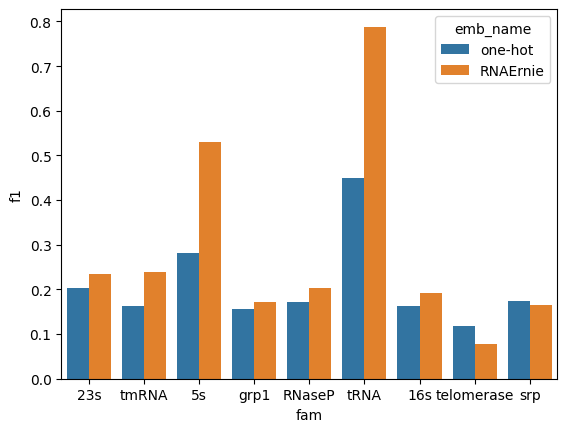

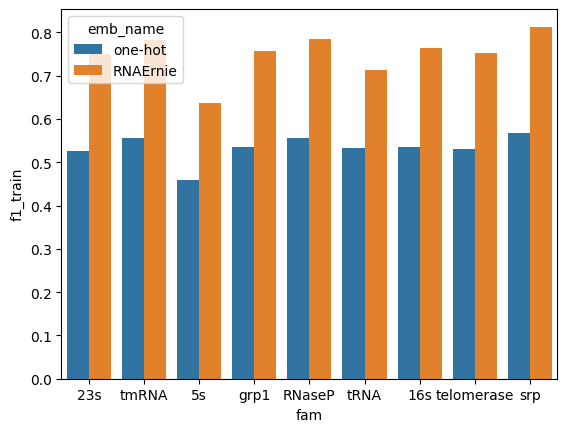

In [2]:
import pandas as pd 
import os 

# famfold
res_path = "../../insync/lncRNA/LLM-RNA/results/"
summary = []
for res in os.listdir(res_path):
    if "results_" in res and "famfold" in res:
        emb_name = res.split("_")[1]
        path = os.path.join(res_path, res)
        for fam in os.listdir(path):
            try: 
                df = pd.read_csv(os.path.join(path, fam, "metrics.csv"))
            except FileNotFoundError:
                continue
            f1, f1_shift, f1_post = df["test_f1"].iloc[-1], df["test_f1_shift"].iloc[-1], df["test_f1_post_rinalmo"].iloc[-1]
            f1_train = df["train_f1"].iloc[-1]
            summary.append([res, fam, emb_name, f1_train, f1, f1_shift, f1_post])

summary = pd.DataFrame(summary, columns=["res", "fam", "emb_name", "f1_train", "f1", "f1_shift", "f1_post"])

# boxplot
from matplotlib import pyplot as plt
import seaborn as sns
sns.barplot(data=summary, x="fam", y="f1", hue="emb_name")
plt.figure()
sns.barplot(data=summary, x="fam", y="f1_train", hue="emb_name")

<Axes: xlabel='test_partition', ylabel='f1_train'>

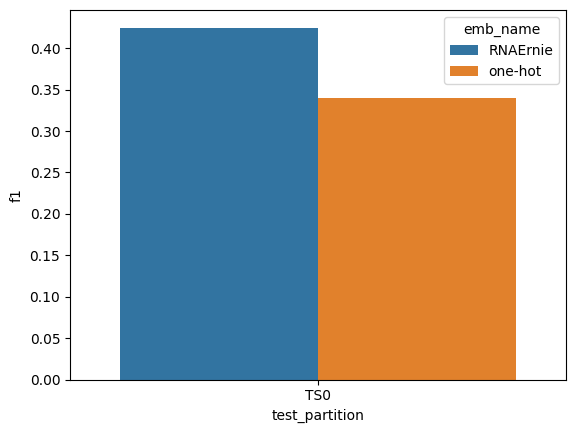

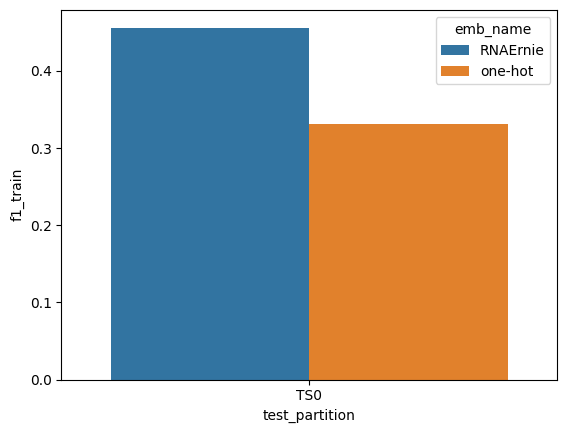

In [10]:
import pandas as pd 
import os 

# famfold
res_path = "../../insync/lncRNA/LLM-RNA/results/"
summary = []
for res in os.listdir(res_path):
    if "results_" in res and "bpRNA" in res:
        emb_name = res.split("_")[1]
        path = os.path.join(res_path, res)
        try: 
            df = pd.read_csv(os.path.join(path, "metrics.csv"))
        except FileNotFoundError:
            continue
        f1, f1_shift, f1_post = df["test_f1"].iloc[-1], df["test_f1_shift"].iloc[-1], df["test_f1_post_rinalmo"].iloc[-1]
        f1_train = df["train_f1"].iloc[-1]
        summary.append([res, "TS0", emb_name, f1_train, f1, f1_shift, f1_post])

summary = pd.DataFrame(summary, columns=["res", "test_partition", "emb_name", "f1_train", "f1", "f1_shift", "f1_post"])

# boxplot
from matplotlib import pyplot as plt
import seaborn as sns
sns.barplot(data=summary, x="test_partition", y="f1", hue="emb_name")
plt.figure()
sns.barplot(data=summary, x="test_partition", y="f1_train", hue="emb_name")